In [266]:
import pandas as pd
df =  pd.read_csv('sg_top_50_bv.csv')

df = df.iloc[::-1]

df = df.reset_index()

df.index = df['Period']

df = df.drop(['Period', 'index'], axis = 1)

# replace the blanks with nans
df = df.replace(' -   ', np.nan)

colnames = list(df.columns)

df[colnames] = df[colnames].apply(pd.to_numeric, errors = 'coerce')

def top_and_bottom(arr, n=5):
    arr = np.sort(arr)[::-1]
    arr = arr[~np.isnan(arr)]
    top5 = arr[:n]
    bot5 = arr[-n:]
    return top5.mean()-bot5.mean()

# lets check the average BV of the top and bottom 10%
input_values = df.iloc[1].values
np.set_printoptions(precision=2, suppress=True)
top_and_bottom(input_values)

61.73799999999999

#### Lets look at how the average book value has performed

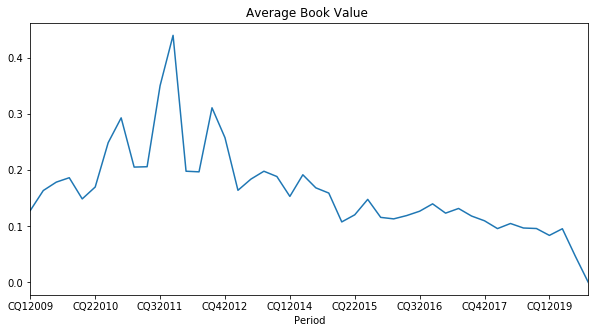

In [291]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.mean(axis = 1).plot(title='Average Book Value ')

#### Average book value has been declining - does it mean the value is cheap? Now, lets look at the most expensive stocks minus the cheapest stocks (high BV - low BV)

In [284]:
a = []
for i in range(df.shape[0]):
    a.append(top_and_bottom(df.iloc[i].values))
odf = pd.DataFrame(a, columns = ['Value_spread'], index = df.index)

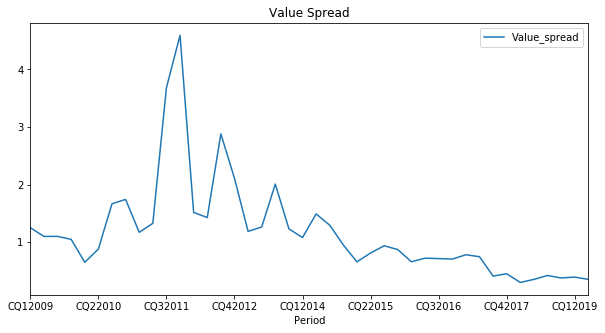

In [285]:

odf[0:-2].plot(figsize = (10,5), title='Value Spread')


In [286]:
import pandas as pd
df =  pd.read_csv('ROE.csv')

df = df.iloc[::-1]

df = df.reset_index()

df.index = df['Period']

df = df.drop(['Period', 'index'], axis = 1)

# replace the blanks with nans
df = df.replace(' -   ', np.nan)

colnames = list(df.columns)

df[colnames] = df[colnames].apply(pd.to_numeric, errors = 'coerce')

def top_and_bottom(arr, n=5):
    arr = np.sort(arr)[::-1]
    arr = arr[~np.isnan(arr)]
    top5 = arr[:n]
    bot5 = arr[-n:]
    return top5.mean()-bot5.mean()

# lets check the average BV of the top and bottom 10%
input_values = df.iloc[1].values
np.set_printoptions(precision=2, suppress=True)
top_and_bottom(input_values)

1.1009336

In [287]:
a = []
for i in range(df.shape[0]):
    a.append(top_and_bottom(df.iloc[i].values))
odf = pd.DataFrame(a, columns = ['Value_spread'], index = df.index)

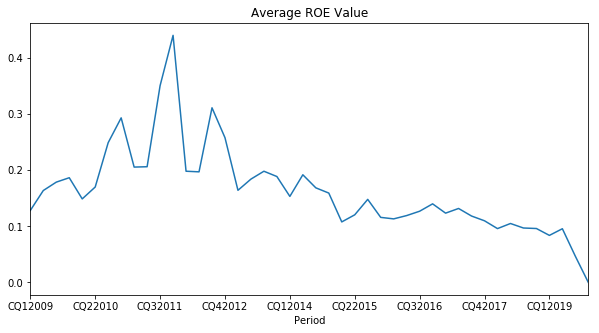

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.mean(axis = 1).plot(title='Average ROE Value')

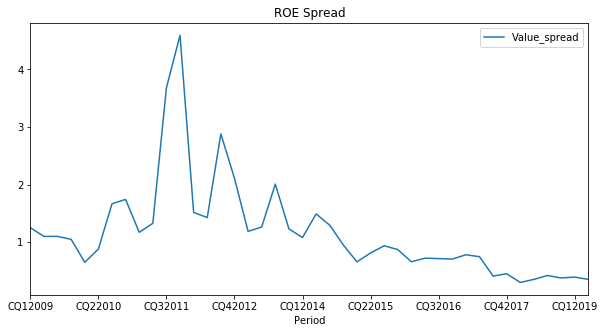

In [289]:
odf[0:-2].plot(figsize = (10,5), title='ROE Spread')

C:\Users\L\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\numpy\core\fromnumeric.py:878: RuntimeWarning: invalid value encountered in less
  a.sort(axis=axis, kind=kind, order=order)
C:\Users\L\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\numpy\core\fromnumeric.py:878: RuntimeWarning: invalid value encountered in greater
  a.sort(axis=axis, kind=kind, order=order)


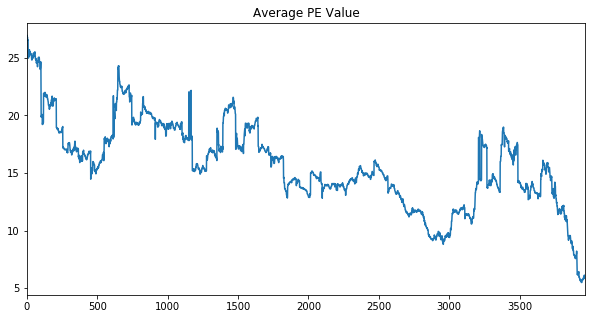

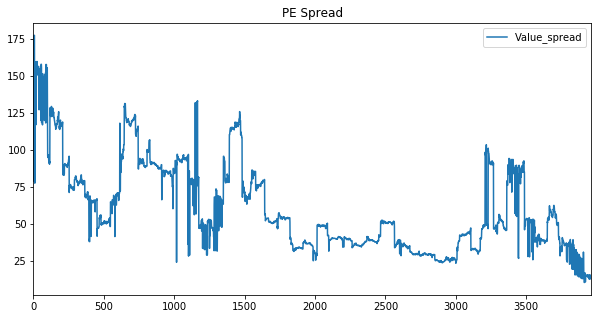

In [22]:
import pandas as pd
import numpy as np

df = pd.read_excel('PE_ratios.xlsx', sheet_name = 'PE', header = 2)
col_list = list(df.columns)
col_list[0] = 'Date'
col_list
df.columns = col_list
df.head()

colnames = list(df.columns[1:])
df[colnames] = df[colnames].apply(pd.to_numeric, errors='coerce')
df.dtypes

def top_and_bottom(arr, n=5):
    arr = np.sort(arr)[::-1]
    arr = np.array(arr, dtype = np.float64)
    arr = arr[~np.isnan(arr)]
    top5 = arr[:n]
    bot5 = arr[-n:]
    return top5.mean()-bot5.mean()


#loop through all rows and calculate the value spread
a = []
for i in range(df.shape[0]):
    a.append(top_and_bottom(df.iloc[i,1:].values))
odf = pd.DataFrame(a, columns = ['Value_spread'], index = df.index)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.mean(axis = 1).plot(title='Average PE Value')

odf[0:-2].plot(figsize = (10,5), title='PE Spread')

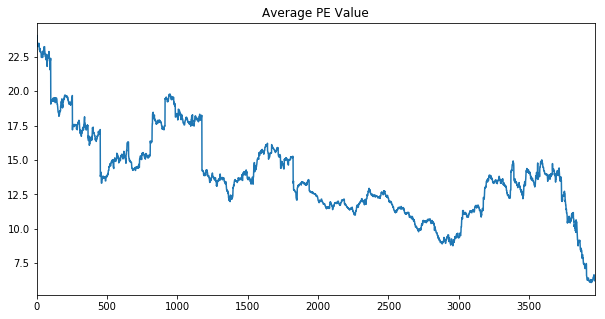

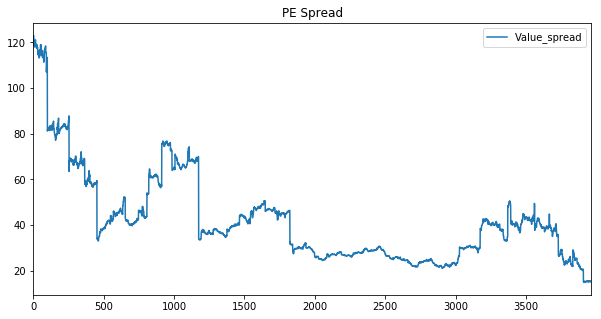

In [33]:
# remove stocks with no PE ratio data

import pandas as pd
import numpy as np

df = pd.read_excel('PE_ratios.xlsx', sheet_name = 'PE', header = 2)
col_list = list(df.columns)
col_list[0] = 'Date'
col_list
df.columns = col_list
df.head()

colnames = list(df.columns[1:])
df[colnames] = df[colnames].apply(pd.to_numeric, errors='coerce')
df.dtypes

def top_and_bottom(arr, n=5):
    arr = np.sort(arr)[::-1]
    arr = np.array(arr, dtype = np.float64)
    arr = arr[~np.isnan(arr)]
    top5 = arr[:n]
    bot5 = arr[-n:]
    return top5.mean()-bot5.mean()

# remove stocks with no PE ratio data
df = df.dropna(axis = 1)

#loop through all rows and calculate the value spread
a = []
for i in range(df.shape[0]):
    a.append(top_and_bottom(df.iloc[i,1:].values))
odf = pd.DataFrame(a, columns = ['Value_spread'], index = df.index)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.mean(axis = 1).plot(title='Average PE Value')

odf[0:-2].plot(figsize = (10,5), title='PE Spread')